In [7]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim


1 DIMENSION 

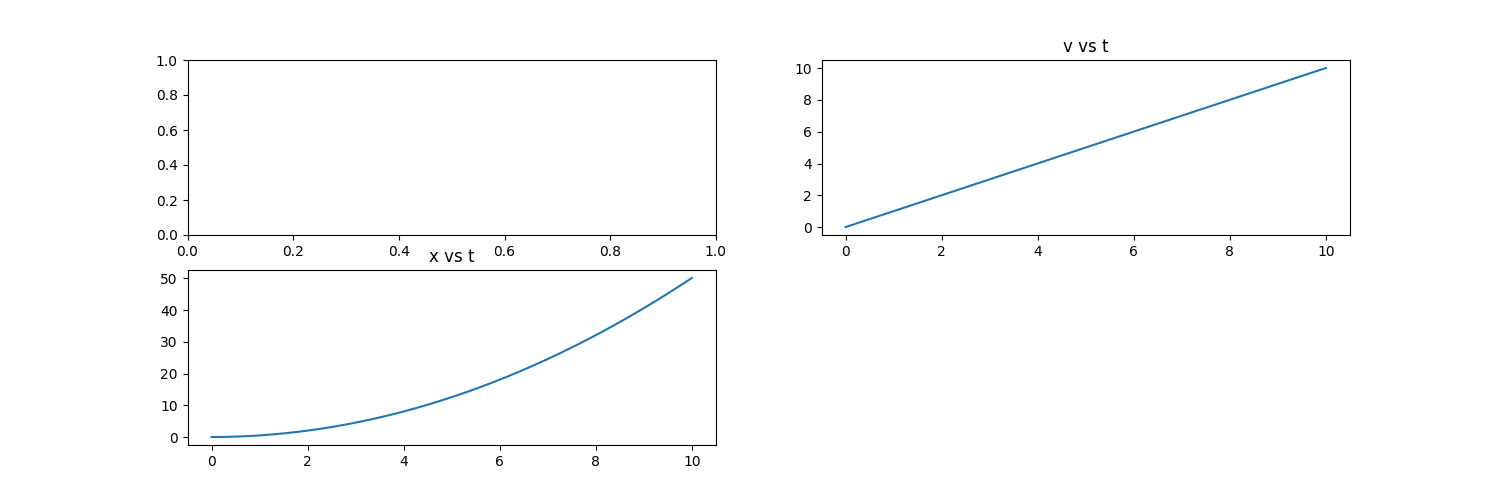

In [12]:
t=np.linspace(0,10,1000)
dt=t[2]-t[1]
X=np.zeros_like(t)
V=np.zeros(len(t)+1)

m=1
f=1
#Condiciones iniciales
X[0]=0
V[0]=0
A=f/m
#integracion 
for i in range(len(t)):
    V[i]=V[i-1]+A*dt
    X[i]=X[i-1]+V[i]*dt
    
    
#Animacion    
fig= plt.figure(figsize=(15,5))
ax=fig.add_subplot(221)
ax_1=fig.add_subplot(223)
ax_1.plot(t,X)
ax_1.set_title("x vs t")
ax_2=fig.add_subplot(222)
ax_2.plot(t,V[0:-1])
ax_2.set_title("v vs t")
scale = 10
t1 = t[::scale]
X1=X[::scale]
def init():
    
    ax.clear()
    ax.set_title("Animacion")
    ax.set_xlim(0,50)
    ax.set_ylim(-1,1) 
def Update(i):
    init()
    x=X1[i]
    y=0
    circulo=plt.Rectangle((x,y),5,0.5,color="r",fill=True)
    ax.add_patch(circulo)
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)




In [11]:
V

array([ -0.01001001,  -0.02002002,  -0.03003003, ..., -10.        ,
       -10.01001001,   0.        ])

2 DIMENSIONS

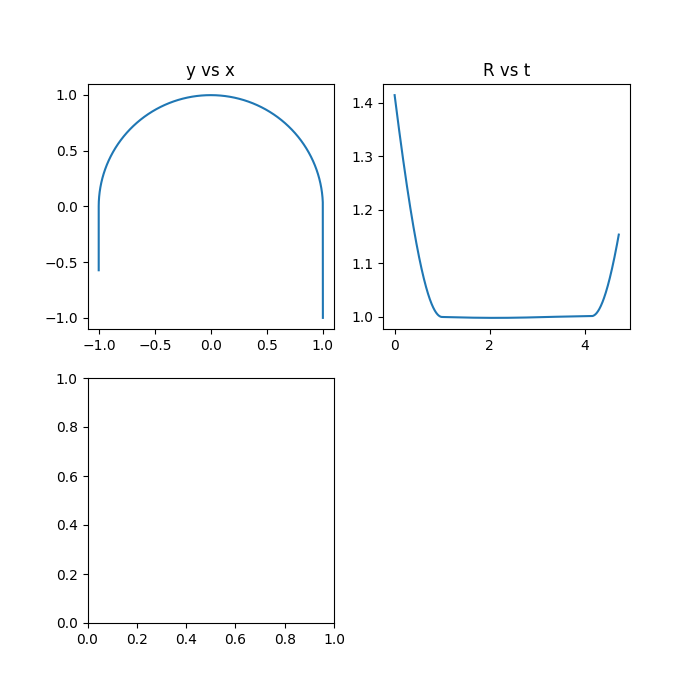

In [9]:
B=1
q=1
m=1
t2=np.linspace(0,1.5*np.pi,1000)
dt2=t2[2]-t2[1]
R=np.zeros((len(t2),2))
V2=np.zeros_like(R)
A2=np.zeros_like(R)


V2[0]=np.array([0,1])
R[0]=np.array([1,-1])
norms=[]
norms.append(np.linalg.norm(R[0]))

for i in range(1,len(t2)):
    V2[i]=V2[i-1]+A2[i-1]*dt2
    R[i]=R[i-1]+V2[i]*dt2
    norms.append(np.linalg.norm(R[i]))
    if R[i,1]>=0:
        normv=np.linalg.norm(V2[i])
        A2[i,0]=-q*normv*B*R[i,0]/np.linalg.norm(R[i])/m
        A2[i,1]=-q*normv*B*R[i,1]/np.linalg.norm(R[i])/m
fig2=plt.figure(figsize=(7,7))
ax1=fig2.add_subplot(221)
ax2=fig2.add_subplot(222)
ax1.plot(R[:,0],R[:,1])
ax2.plot(t2,norms)
ax1.set_title("y vs x")
ax2.set_title("R vs t")
#Animacion    

ax3=fig2.add_subplot(223)

scale = 10
tt = t2[::scale]
R1=R[::scale]
def init2():
    
    ax3.clear()
    ax3.set_title("Animacion")
    ax3.set_xlim(-1.1,1.1)
    ax3.set_ylim(-1.1,1.1) 
    

def Update2(i):
    init2()
    x=R1[i,0]
    y=R1[i,1]
    circulo=plt.Circle((x,y),0.05,color="r",fill=True)
    ax3.add_patch(circulo)
Animation2 = anim.FuncAnimation(fig2,Update2,frames=len(tt),init_func=init2)

